In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import convolve
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Code Citations

- To display bar counts above the bars in a bar plot this article was referenced: 
https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

- To plot crimes by district (different colored dots) the article was referenced:
https://www.python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

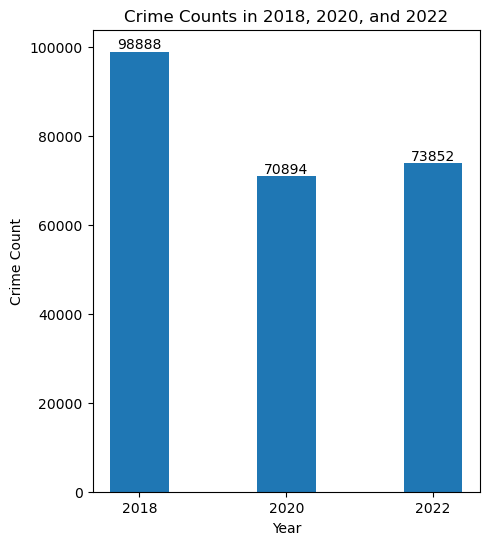

In [2]:
crimes_18 = pd.read_csv('boston_crime_2018.csv')
crimes_20 = pd.read_csv('boston_crime_2020.csv', low_memory=False)
crimes_22 = pd.read_csv('boston_crime_2022.csv', low_memory=False)

# create a list containing years and the number of crimes that occurred in that year
yearly_counts = [[2018, crimes_18.shape[0]], [2020, crimes_20.shape[0]], [2022, crimes_22.shape[0]]]
data = np.array(yearly_counts)

# extract and set years and crime counts
years = data[:, 0]
crime_counts = data[:, 1]

# create the count plot
plt.figure(figsize=(5, 6))
plt.bar(years, crime_counts)
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Counts in 2018, 2020, and 2022')

# set the x-tick labels to show 2018, 2020, 2022
plt.xticks(years)

# label the bars
for i in range(len(years)):
    plt.annotate(crime_counts[i], (years[i], crime_counts[i]), ha='center', va='bottom')

plt.show

In [3]:
# plots crimes by district
def plot_district(data):
    min_longitude = -71.2
    max_longitude = -70.9
    min_latitude = 42.2
    max_latitude = 42.4

    hue_order = ['B2', 'A1', 'C6', 'C11', 'D4', 'E13', 'B3', 'A7', 'E18', 'A15', 'E5', 'D14', 'External']
    sns.scatterplot( x='Long', y='Lat', data=data, hue='DISTRICT', hue_order=hue_order, alpha=0.2, s=1, legend=True)
    plt.xlim([min_longitude, max_longitude])
    plt.ylim([min_latitude, max_latitude])
    plt.legend(loc='lower right')

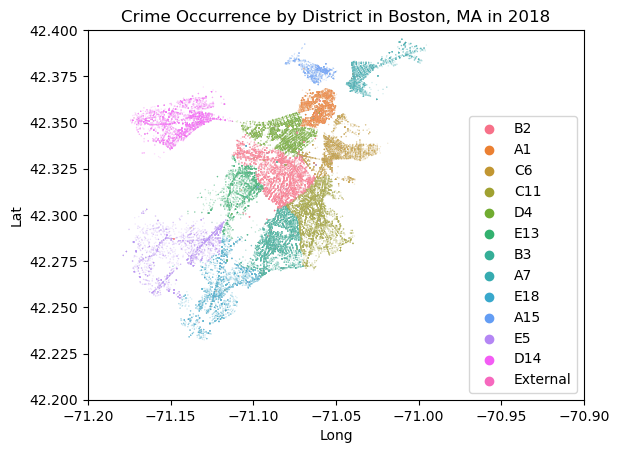

In [4]:
# plot 2018 crimes by district
crimes_18 = pd.read_csv('boston_crime_2018.csv')
crimes_18 = crimes_18[['Lat', 'Long', 'DISTRICT']]

crimes_18.dropna(inplace=True)

plot_district(crimes_18)
plt.title('Crime Occurrence by District in Boston, MA in 2018')
plt.show()

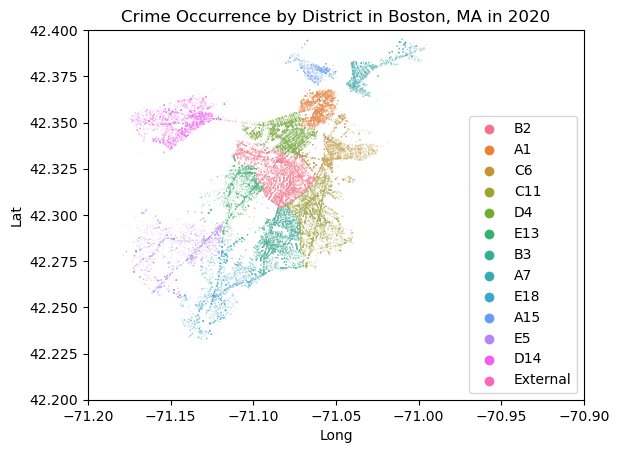

In [5]:
# plot 2020 crimes by district
crimes_20 = pd.read_csv('boston_crime_2020.csv', low_memory=False)
crimes_20 = crimes_20[['Lat', 'Long', 'DISTRICT']]

crimes_20.dropna(inplace=True)
crimes_20.drop(index=69981, axis=0, inplace=True)

plot_district(crimes_20)
plt.title('Crime Occurrence by District in Boston, MA in 2020')
plt.show()

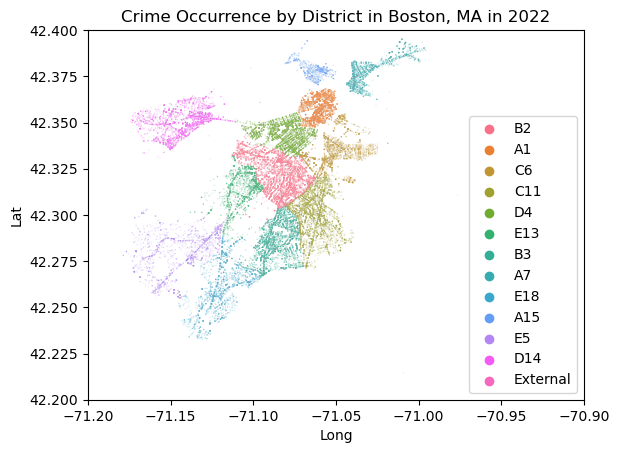

In [6]:
# plot 2022 crimes by district
crimes_22 = pd.read_csv('boston_crime_2022.csv', low_memory=False)
crimes_22 = crimes_22[['Lat', 'Long', 'DISTRICT']]

# the rows to drop
rows = []

# create a list of row indices that have longitudes or latitudes that are not in Boston
for i in range(crimes_22.shape[0]):
    if (((crimes_22['Long'][i] < -71.2) | (crimes_22['Long'][i] > -70.9)) |
        ((crimes_22['Lat'][i] < 42.2) | (crimes_22['Lat'][i] > 42.4))):
        rows.append(i)
        
# drop the rows outside of Boston
crimes_22.drop(rows, inplace=True)
        
crimes_22.dropna(inplace=True)

plot_district(crimes_22)
plt.title('Crime Occurrence by District in Boston, MA in 2022')
plt.show()

In [7]:
# scales given data with longitudes and latitudes to 0-999
def scale_coords(data, size):
    min_longitude = -71.2
    max_longitude = -70.9
    min_latitude = 42.2
    max_latitude = 42.4

    # ((longitude - min) / (max - min)) * size to scale to 0-size
    scaled_longitudes = ((data['Long'] - min_longitude) / (max_longitude - min_longitude)) * size
    data['Long'] = scaled_longitudes

    # ((min - latitude) / (max - min)) * size to scale to 0-size
    scaled_latitudes = ((min_latitude - data['Lat']) / (max_latitude - min_latitude)) * size
    data['Lat'] = scaled_latitudes

    # round to ints
    data['Long'] = data['Long'].round().astype(int)
    data['Lat'] = data['Lat'].round().astype(int)

# performs array processing to create a 2d scalar representation of the given crimes and their longitudes and 
# latitudes
def create_array(crimes_array, size):
    # populate a new 1000x1000 with zeros
    plot = np.zeros((size, size), dtype=int)

    # find corresponding longitude and latitude cell of every crime in the data set and 
    # keep count of the number of crimes in each cell
    for crime in crimes_array:
        longitude = crime[1]
        latitude = crime[0]
    
        plot[latitude][longitude] += 1
    
    return plot

# blurs given array by given kerne
def blur_array(arr, kernel):
    kernel = np.full((kernel, kernel), (1 / (kernel**2)))
    blurred_arr = convolve(arr, kernel)
    return blurred_arr

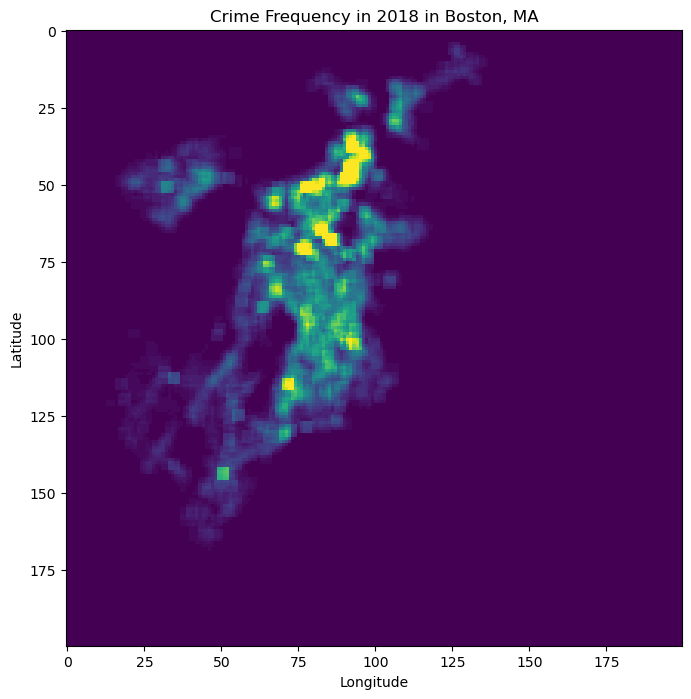

In [69]:
crimes_18 = pd.read_csv('boston_crime_2018.csv')
crimes_18 = crimes_18[['Lat', 'Long', 'DISTRICT']]

crimes_18.dropna(inplace=True)

scale_coords(crimes_18, 200)

# assign the values to a numpy array
crimes_18_array = crimes_18.values

plot_18 = create_array(crimes_18_array, 200)

plot_18 = blur_array(plot_18, 4)

plt.figure(figsize=(8,8), dpi=100)
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.title('Crime Frequency in 2018 in Boston, MA')
plt.imshow(plot_18, cmap='viridis', vmax=50)

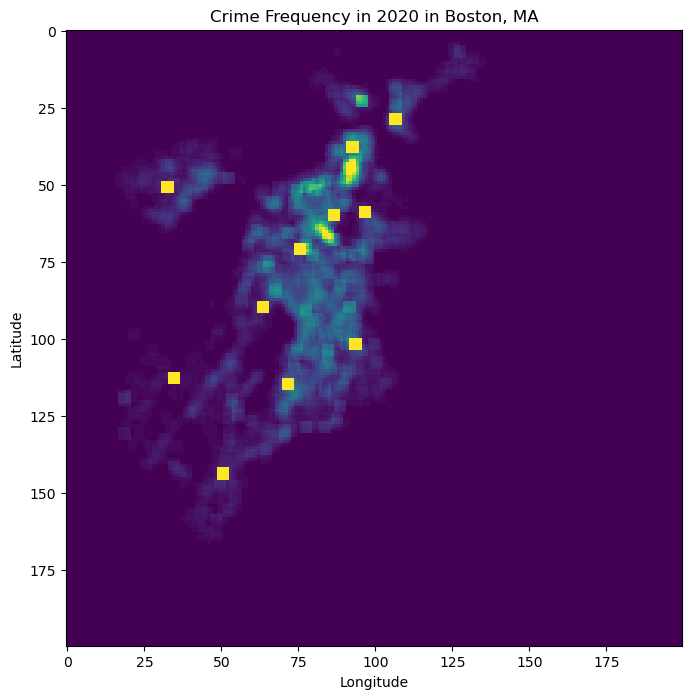

In [73]:
crimes_20 = pd.read_csv('boston_crime_2020.csv', low_memory=False)
crimes_20 = crimes_20[['Lat', 'Long', 'DISTRICT']]

crimes_20.dropna(inplace=True)
crimes_20.drop(index=69981, axis=0, inplace=True)

scale_coords(crimes_20, 200)

# assign the values to a numpy array
crimes_20_array = crimes_20.values

plot_20 = create_array(crimes_20_array, 200)

plot_20 = blur_array(plot_20, 4)

plt.figure(figsize=(8,8), dpi=100)
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.title('Crime Frequency in 2020 in Boston, MA')
plt.imshow(plot_20, cmap='viridis', vmax=50)

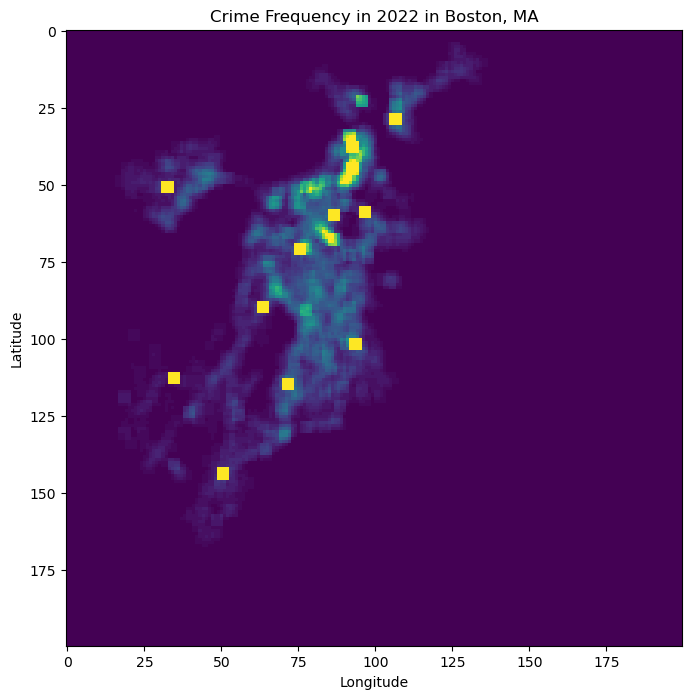

In [63]:
crimes_22 = pd.read_csv('boston_crime_2022.csv', low_memory=False)
crimes_22 = crimes_22[['Lat', 'Long', 'DISTRICT']]

# the rows to drop
rows = []

# create a list of row indices that have longitudes or latitudes that are not in Boston
for i in range(crimes_22.shape[0]):
    if (((crimes_22['Long'][i] < -71.2) | (crimes_22['Long'][i] > -70.9)) |
        ((crimes_22['Lat'][i] < 42.2) | (crimes_22['Lat'][i] > 42.4))):
        rows.append(i)
        
# drop the rows outside of Boston
crimes_22.drop(rows, inplace=True)
        
crimes_22.dropna(inplace=True)

scale_coords(crimes_22, 200)

# assign the values to a numpy array
crimes_22_array = crimes_22.values

plot_22 = create_array(crimes_22_array, 200)

plot_22 = blur_array(plot_22, 4)
    
plt.figure(figsize=(8,8), dpi=100)
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.title('Crime Frequency in 2022 in Boston, MA')
plt.imshow(plot_22, cmap='viridis', vmax = 50)

In [11]:
# create data frames with each crime data set
df_18 = pd.DataFrame(crimes_18)
df_20 = pd.DataFrame(crimes_20)
df_22 = pd.DataFrame(crimes_22)

# group by district
grouped_18 = df_18.groupby('DISTRICT')
grouped_20 = df_20.groupby('DISTRICT')
grouped_22 = df_22.groupby('DISTRICT')

def plot_differences(data_1, data_2):
    difference = data_2.size() - data_1.size()

    districts = list(difference.keys())
    differences = list(difference)

    plt.bar(districts, differences, width=0.8)
    for i in range(len(districts)):
        if (difference[i] < 0):
            plt.annotate(difference[i], (districts[i], difference[i]), ha='center', va='top', fontsize=7)
        else:
            plt.annotate(difference[i], (districts[i], difference[i]), ha='center', va='bottom', fontsize=7)

Text(0.5, 1.0, 'Crime Count Differences in Boston Districts from 2018 to 2020')

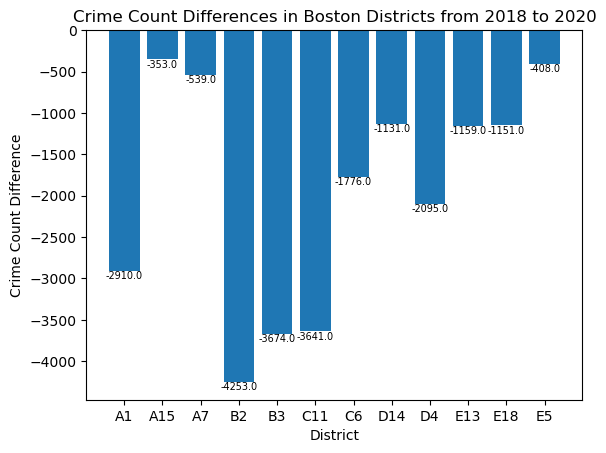

In [12]:
plot_differences(grouped_18, grouped_20)
plt.xlabel('District') 
plt.ylabel('Crime Count Difference') 
plt.title('Crime Count Differences in Boston Districts from 2018 to 2020')

Text(0.5, 1.0, 'Crime Count Differences in Boston Districts from 2020 to 2022')

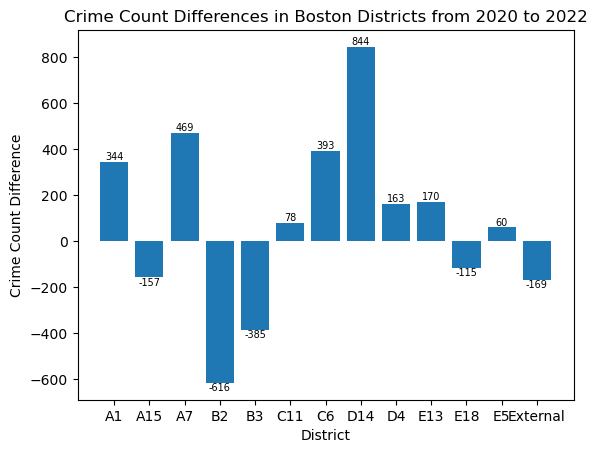

In [13]:
plot_differences(grouped_20, grouped_22)
plt.xlabel('District') 
plt.ylabel('Crime Count Difference') 
plt.title('Crime Count Differences in Boston Districts from 2020 to 2022')

In [76]:
crimes_18 = pd.read_csv('boston_crime_2018.csv')

crimes_18.drop(crimes_18[crimes_18['DISTRICT'] != 'B2'].index, inplace=True)

crimes_18 = crimes_18[['OFFENSE_CODE', 'DISTRICT']]

df = pd.DataFrame(crimes_18)

# the most common crime type in 2018
print(df.mode())

   OFFENSE_CODE DISTRICT
0          3006       B2


In [77]:
crimes_20 = pd.read_csv('boston_crime_2020.csv', low_memory=False)

crimes_20.drop(crimes_20[crimes_20['DISTRICT'] != 'B2'].index, inplace=True)

crimes_20 = crimes_20[['OFFENSE_CODE', 'DISTRICT']]

df = pd.DataFrame(crimes_20)

# the most common crime type in 2020
print(df.mode())

   OFFENSE_CODE DISTRICT
0          3831       B2


In [78]:
crimes_22 = pd.read_csv('boston_crime_2022.csv', low_memory=False)

crimes_22.drop(crimes_22[crimes_22['DISTRICT'] != 'B2'].index, inplace=True)

crimes_22 = crimes_22[['OFFENSE_CODE', 'DISTRICT']]

df = pd.DataFrame(crimes_22)

# the most common crime type in 2022
print(df.mode())

   OFFENSE_CODE DISTRICT
0          3115       B2
